# Лабораторная работа №5

# Решение уравнения параболического типа

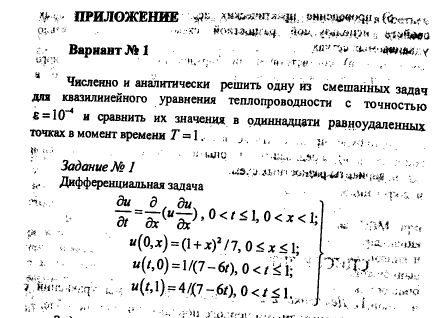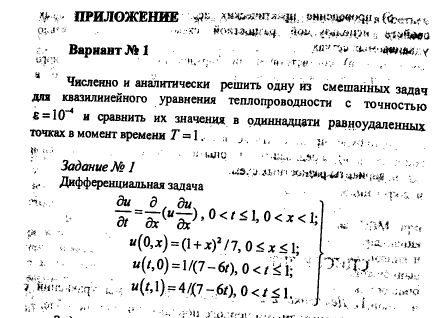

## Импорт необходимых библиотек

In [19]:
import numpy as np              
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pprint

## Расчет очередного слоя сетки

In [21]:
def next_iter(u, layer, part, h, tau):
    
    N = len(u[0])

    A = np.full([N - 2, N - 2], 0.0, dtype=float)
    for i in range(0, N-2):
        if i > 0:
            A[i][i-1] = part[i] / h**2
        if i < N-3:
            A[i][i+1] = part[i+1] / h**2
        A[i][i]= - (part[i+1] + part[i] )/ h**2 - 1 / tau

    b= np.full([N-2], None, dtype=float)
    for i in range(0, N-2):
        b[i] = -((u[layer])[i+1])/tau    
    b[0] += - part[0] * u[layer + 1][0] / h**2
    b[N-3] += - part[N-2] * u[layer + 1][N-1] / h**2

  # решение трехдиагональной матрицы
    res= np.linalg.solve(A,b)

    iterationResult = u[layer+1].copy()
    for i in range(0, N-2):
        iterationResult[i+1] = res[i]
    return iterationResult


def next_layer(u, layer, h, tau, prec):
    aHalf = np.full([N-1], None, dtype=float)
    for i in range(0, N-1):
        aHalf[i] = (u[layer][i] + u[layer][i+1]) / 2.0

    norm = 1
    prevIterRes = u[layer].copy()
    while(norm > prec):
        iterRes = next_iter(u, layer, aHalf, h, tau)

        for i in range(0, N-1):
            aHalf[i] = (fA(prevIterRes[i+1]) + fADif(prevIterRes[i+1]) * (iterRes[i+1] - prevIterRes[i+1]) 
                + fA(prevIterRes[i]) + fADif(prevIterRes[i]) * (iterRes[i] - prevIterRes[i])) / 2.0

        norm = np.linalg.norm(iterRes - prevIterRes)
        prevIterRes = iterRes

    return prevIterRes


def plot_3d(N, matrix):
    x = np.linspace(0, 1, N) 
    y = np.linspace(0, 1, N) 
    X, Y = np.meshgrid(x, y) 


    fig = plt.figure(figsize=[18, 10])

    ax = plt.axes(projection ='3d') 
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('t', fontsize=15)
    ax.set_zlabel('u', fontsize=15)

    ax.plot_surface(X, Y, matrix, cmap='viridis', linewidths=0.2)
    plt.show()

    
def plot_2d(u, N):
    x = np.linspace(0, 1, N) 
    plt.figure(figsize=[18, 8])
    plt.grid()
    plt.ylabel('u')
    plt.xlabel('x')
    plt.plot(x, u[N-1])
    plt.show()


## Задание начальных условий и параметров сетки, подсчет слоев

In [22]:

def u_0_x (x):
    return (1 + x) ** 2

def u_t_0(t):
    return 1.0 / (7 - 6 * t)

def u_t_1(t):
    return 4 / (7 - 6 * t)

def fA(u):
    return u ** (1/2)

def fADif(u):
    return u ** (-1/2) / 2.0

n = 200
N = n + 1
tMax = 1.0
xMax = 1.0
h = xMax / n
tau = tMax / n
prec = 0.0000001


def init_grid():
    
    u = np.full([N, N], None, dtype=float) 
    for i in range(N):
        u[0][i]=u_0_x(i * h)
        u[i][0]=u_t_0(i * tau)
        u[i][N-1] = u_t_1(i * tau)

    for i in range(1, N):
        u[i] = next_layer(u, i-1, h, tau, prec)
    return u

## Трехмерный график решения

In [ ]:

u = init_grid()
matrix = np.asarray(u)
plot_3d(N, matrix)



## Двумерный график решения

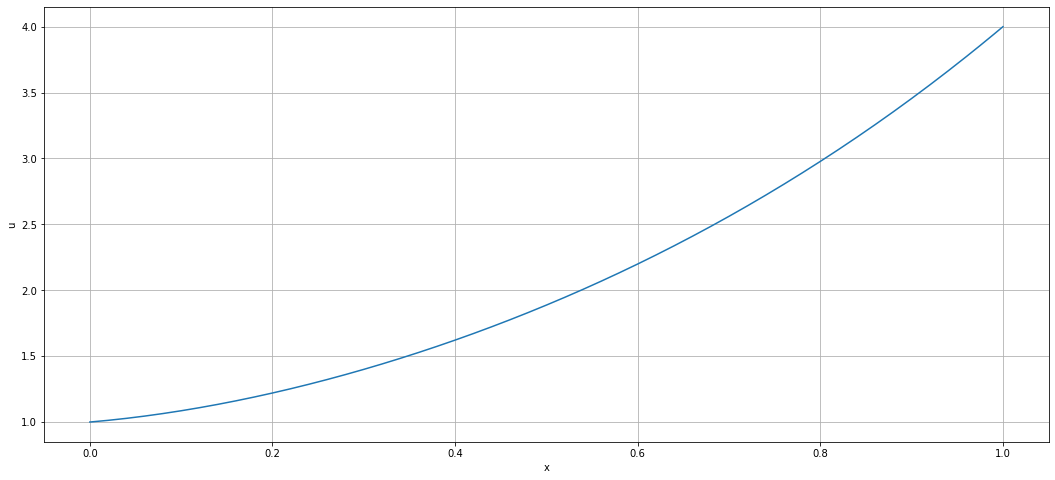

In [13]:

plot_2d(u, N)